In [26]:
%matplotlib inline

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

gpwb = pd.read_csv('vektis_2020.csv', sep=';')
gpwb.info()

gpwb = gpwb[['leeftijdsklasse', 'kosten_specialistische_ggz', 'kosten_langdurige_ggz', 'kosten_generalistische_basis_ggz', 'aantal_verzekerdejaren']]





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   geslacht                                13062 non-null  object 
 1   leeftijdsklasse                         13062 non-null  object 
 2   gemeentenaam                            13062 non-null  object 
 3   aantal_bsn                              13063 non-null  int64  
 4   aantal_verzekerdejaren                  13063 non-null  float64
 5   kosten_medisch_specialistische_zorg     13063 non-null  float64
 6   kosten_farmacie                         13063 non-null  float64
 7   kosten_specialistische_ggz              13063 non-null  float64
 8   kosten_huisarts_inschrijftarief         13063 non-null  float64
 9   kosten_huisarts_consult                 13063 non-null  float64
 10  kosten_huisarts_mdz                     13063 non-null  fl

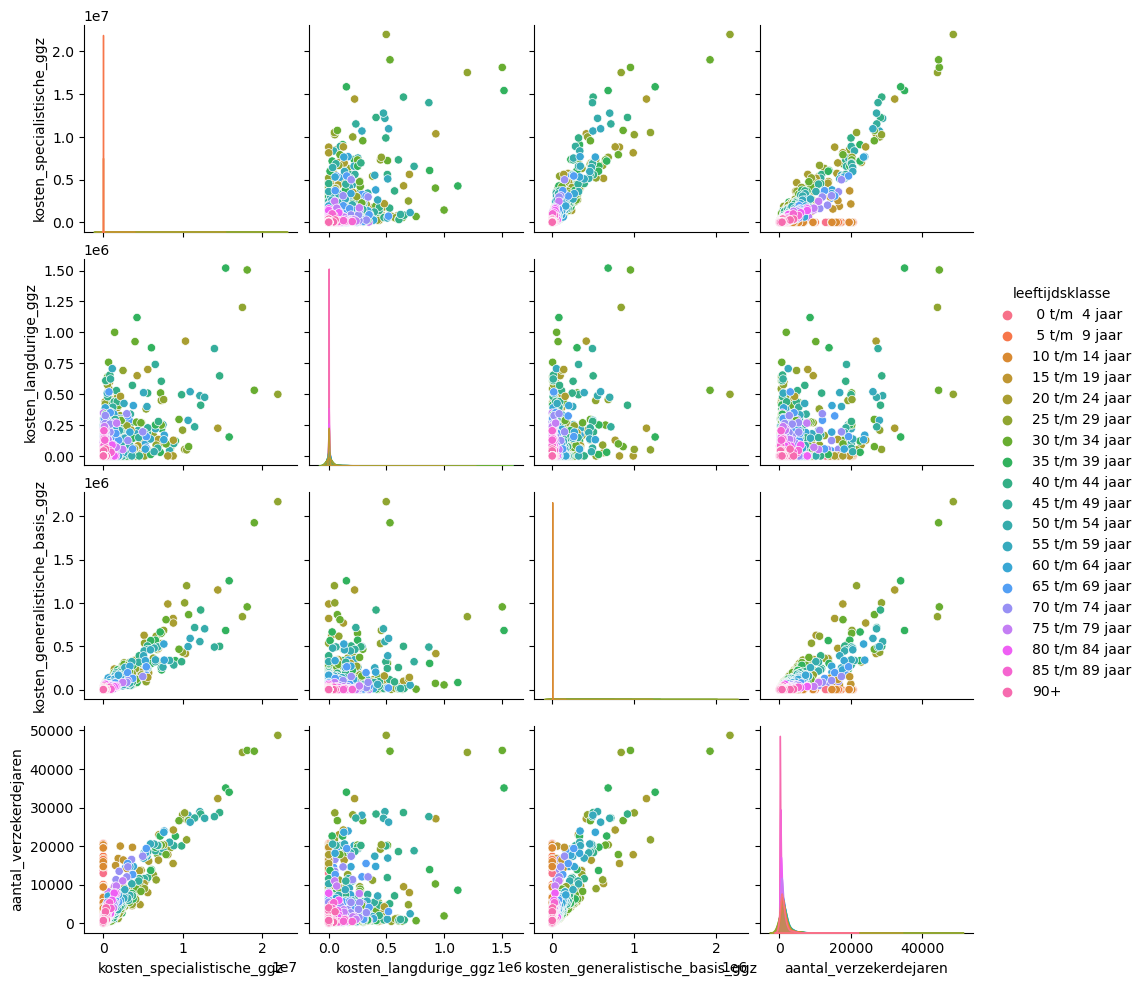

In [27]:
sb.pairplot(gpwb, hue='leeftijdsklasse')

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
gpwbWithout = gpwb.drop(columns=['leeftijdsklasse'])
kmeans.fit(gpwbWithout)
pd.crosstab(gpwb['leeftijdsklasse'], kmeans.labels_)

col_0,0,1
leeftijdsklasse,,
0 t/m 4 jaar,687,0
5 t/m 9 jaar,688,0
10 t/m 14 jaar,688,0
15 t/m 19 jaar,688,0
20 t/m 24 jaar,672,16
25 t/m 29 jaar,674,14
30 t/m 34 jaar,677,11
35 t/m 39 jaar,679,9
40 t/m 44 jaar,680,8


In [29]:
for x in range(20):
    kmeans = KMeans(n_clusters=x+1)
    kmeans.fit(gpwbWithout)

1 : 8524499888012748.0
2 : 3336333059456352.5
3 : 1855436043737967.0
4 : 1131672562066387.5
5 : 768454185001228.5
6 : 558550795365004.6
7 : 411126575178017.25
8 : 330149713808174.9
9 : 269988154339258.94
10 : 228440097572555.6
11 : 189878349906892.56
12 : 161628551666007.47
13 : 143357870727070.66
14 : 128394733442184.98
15 : 116856116430090.1
16 : 105679570468786.11
17 : 96652654421557.75
18 : 88791193433931.94
19 : 80801060269302.81


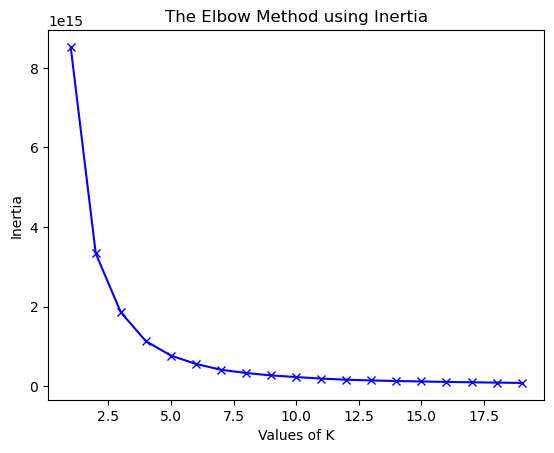

In [31]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# Maak een elbow plot met de resultaten die je eerder berekend hebt. 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(gpwbWithout)
    kmeanModel.fit(gpwbWithout)
  
    distortions.append(sum(np.min(cdist(gpwbWithout, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / gpwbWithout.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(gpwbWithout, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / gpwbWithout.shape[0]
    mapping2[k] = kmeanModel.inertia_


for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()